In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #For specifying axes ticks
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

In [2]:
import pandas as pd
from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
pwd

'C:\\Users\\19713\\Desktop\\Data Science Projects'

In [4]:
df = pd.read_csv('C:\\Users\\19713\\Desktop\\Data Science Projects\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.iloc[:, :7].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService
0,7590-VHVEG,Female,0,Yes,No,1,No
1,5575-GNVDE,Male,0,No,No,34,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes
3,7795-CFOCW,Male,0,No,No,45,No
4,9237-HQITU,Female,0,No,No,2,Yes


In [11]:
df.iloc[:, 7:12].head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
0,No phone service,DSL,No,Yes,No
1,No,DSL,Yes,No,Yes
2,No,DSL,Yes,Yes,No
3,No phone service,DSL,Yes,No,Yes
4,No,Fiber optic,No,No,No


In [12]:
df.iloc[:, 12:17].head()

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No,No,Month-to-month,Yes
1,No,No,No,One year,No
2,No,No,No,Month-to-month,Yes
3,Yes,No,No,One year,No
4,No,No,No,Month-to-month,Yes


In [13]:
df.iloc[:, 17:].head()

,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Electronic check,29.85,29.85,No
1,Mailed check,56.95,1889.5,No
2,Mailed check,53.85,108.15,Yes
3,Bank transfer (automatic),42.30,1840.75,No
4,Electronic check,70.70,151.65,Yes


In [14]:
del df['customerID']

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.eq(' ').any(axis = 0)

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [17]:
df['TotalCharges'].str.count(' ').sum()

11

'TotalCharges' has 11 blank values. We can either drop these rows or change them to '0' and convert TotalCharges to 'float.'

In [18]:
df_blankTC = df[df['TotalCharges'] == ' ']
df_blankTC

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df_blankTC['MonthlyCharges']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [20]:
df_blankTC['tenure']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

For these customers, their total charges is 0 because they have been subscribed for less than a month, hence the 0 in the tenure column. 

In [21]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

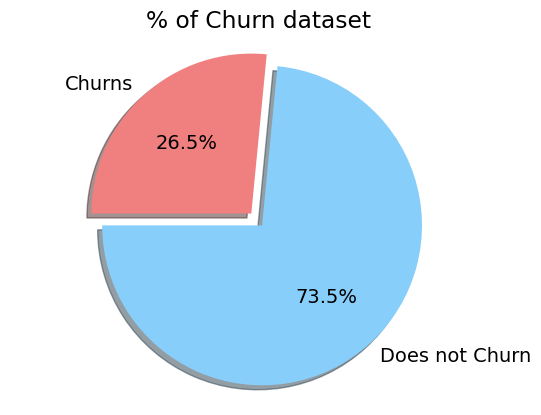

In [24]:
# Plot some features (Density and Bar plots) to visualize the dependence of Churn on tenure and Monthly/Total Charges or the
#percentage of Churn in non-senior citizens
sizes = df['Churn'].value_counts(sort = True)
labels = ['Does not Churn', 'Churns']
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) #explode Churns

fig = plt.figure()
plt.pie(sizes, 
        labels = labels, 
        colors = colors,
       explode = explode,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 180)
plt.axis('equal')
plt.title('% of Churn dataset')
plt.show()
fig.savefig('Churn_pi-chart.pdf')

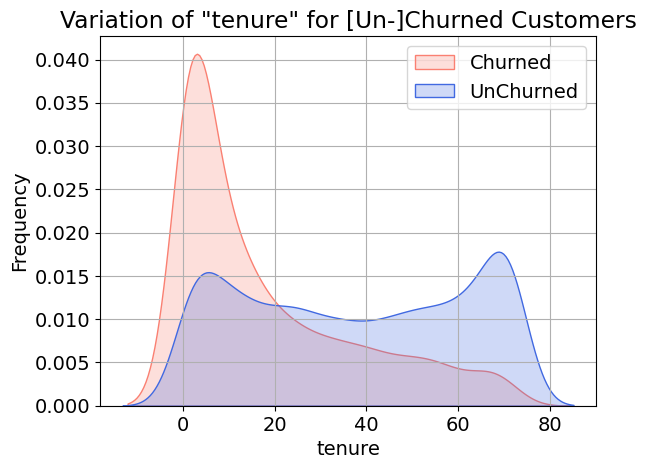

In [25]:
#tenure density plot
fig = plt.figure()
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes')], 
                color = "salmon", shade = True)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No')], 
                ax = ax, color = "royalblue", shade = True)
ax.set_xlabel("tenure")
ax.set_ylabel("Frequency")
plt.title('Variation of "tenure" for [Un-]Churned Customers')
ax = ax.legend(["Churned", "UnChurned"])
fig.savefig('Churn_tenure_density-plot.pdf')

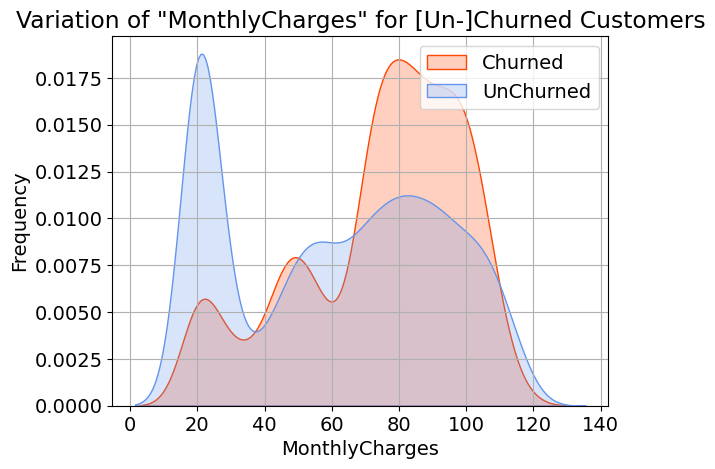

In [26]:
#MonthlyCharges density plot
fig = plt.figure()
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], 
                color = "orangered", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], 
                ax = ax, color = "cornflowerblue", shade = True)
ax.set_xlabel("MonthlyCharges")
ax.set_ylabel("Frequency")
plt.title('Variation of "MonthlyCharges" for [Un-]Churned Customers')
ax = ax.legend(["Churned", "UnChurned"])
fig.savefig('Churn_MnthlyChrgs_density-plot.pdf')

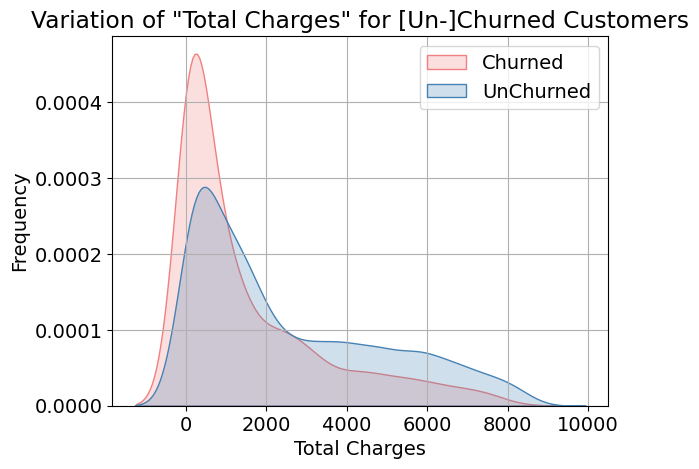

In [27]:
#TotalCharges density plot
fig = plt.figure()
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], 
                color = "lightcoral", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], 
                ax = ax, color = "steelblue", shade = True)
ax.set_xlabel("Total Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Total Charges" for [Un-]Churned Customers')
ax = ax.legend(["Churned", "UnChurned"])
fig.savefig('Churn_TotalChrges_density-plot.pdf')

<Figure size 640x480 with 0 Axes>

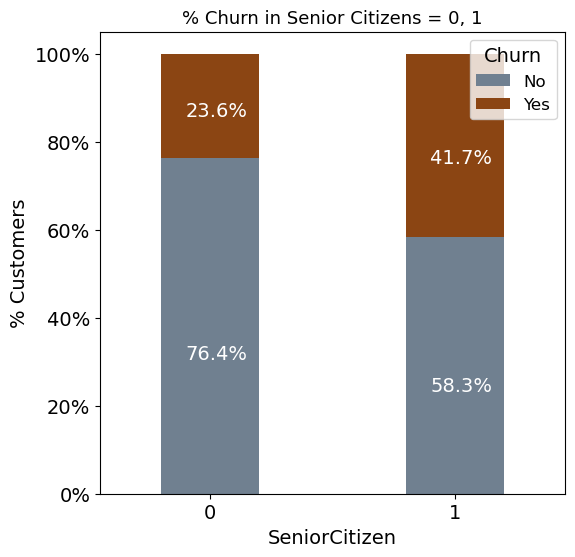

In [28]:
#Senior Citizen - Stacked Bar Chart
colors = ['slategrey', 'saddlebrown']
df_sczn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
fig = plt.figure()

ax = (df_sczn.T*100.0/
     df_sczn.T.sum()).T.plot(kind = 'bar',
                           width = 0.4,
                           stacked = True,
                           rot = 0,
                           figsize = (6,6),
                           color = colors,
                           )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'upper right', prop = {'size':12}, title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('% Churn in Senior Citizens = 0, 1', size = 13)
ax.grid(False)
# Add data labels to the bar diagram
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height),
               (p.get_x()+.25*width, p.get_y()+.4*height),
               color = 'white',
               weight = 'normal',
               size = 14)
fig.savefig('Churn_Sen-Cit_stacked-bar.pdf')    

In [29]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
# Map all categoric columns to numeric values {0, 1, 2, etc.}

df_num = df.copy()

map_num = {"gender": {"Male": 1, "Female": 0},
          "Partner": {"Yes":1, "No": 0},
          "Dependents": {"Yes": 1, "No": 0},
          "PhoneService": {"Yes": 1, "No": 0},
          "MultipleLines": {"Yes": 2, "No": 1, "No phone service": 0},
          "InternetService": {"Fiber optic": 2, "DSL": 1, "No": 0},
          "OnlineSecurity": {"Yes": 2, "No": 1, "No internet service": 0},
          "OnlineBackup": {"Yes": 2, "No": 1, "No internet service": 0},
          "DeviceProtection": {"Yes": 2, "No": 1, "No internet service": 0},
          "TechSupport": {"Yes": 2, "No": 1, "No internet service": 0},
          "StreamingTV": {"Yes": 2, "No": 1, "No internet service": 0},
          "StreamingMovies": {"Yes": 2, "No": 1, "No internet service": 0},
          "Contract": {"Month-to-month": 1,
                      "One year": 12,
                      "Two year": 24},
          "PaperlessBilling": {"Yes": 1, "No": 0},
          "PaymentMethod": {"Electronic check": 1,
                           "Mailed check": 0,
                           "Bank transfer (automatic)": 2,
                           "Credit card (automatic)": 3},
          "Churn": {"Yes":1, "No": 0}
          }
df_num.replace(map_num, inplace = True)
df_num.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,12,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,12,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,1,70.70,151.65,1


In [32]:
for i in df.columns:
    print(f'The unique values of {i} are: {df[i].unique()}')

The unique values of gender are: ['Female' 'Male']
The unique values of SeniorCitizen are: [0 1]
The unique values of Partner are: ['Yes' 'No']
The unique values of Dependents are: ['No' 'Yes']
The unique values of tenure are: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
The unique values of PhoneService are: ['No' 'Yes']
The unique values of MultipleLines are: ['No phone service' 'No' 'Yes']
The unique values of InternetService are: ['DSL' 'Fiber optic' 'No']
The unique values of OnlineSecurity are: ['No' 'Yes' 'No internet service']
The unique values of OnlineBackup are: ['Yes' 'No' 'No internet service']
The unique values of DeviceProtection are: ['No' 'Yes' 'No internet service']
The unique values of TechSupport are: ['No' 'Yes' 'No internet service']
The unique values of StreamingTV are: ['No' 'Yes' 'No i

In [33]:
# Convert data frame to arrays and split into Train/Test datasets
X = df_num.values[:, :19]
y = df_num.values[:, 19]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

In [34]:
df_num

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,12,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,12,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,2,1,2,2,2,2,12,1,0,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,1,2,2,1,2,2,12,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,2,1,1,1,1,1,1,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,1,1,1,1,1,1,1,1,0,74.40,306.60,1


In [36]:
# Building the Tree and Predicting

tree_depth = 3

#for tree depth in range(2, 15):
model_dt = DecisionTreeClassifier(criterion = "gini",
                                 random_state = 39,
                                 max_depth = tree_depth,
                                 min_samples_leaf = 50)

model_dt.fit(X_train, y_train)

# Predict on training and test data sets
y_pren_dt = model_dt.predict(X_train)
y_pret_dt = model_dt.predict(X_test)

#Training set results
cm_train_dt = confusion_matrix(y_train, y_pren_dt)

sens_dt = float(cm_train_dt[0,0]/(cm_train_dt[0,0] + cm_train_dt[0,1]))
spec_dt = float(cm_train_dt[1,1]/(cm_train_dt[1,0] + cm_train_dt[1,1]))

fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_dt, pos_label = 1)

print("d Accu Sens Spec AUC-ROC") #bring out of for-loop (when run)\
print(tree_depth, round(accuracy_score(y_train, y_pren_dt)*100, 2),\
     round(sens_dt*100, 2), round(spec_dt*100, 2), \
     round(metrics.auc(fpr, tpr)*100, 2))

d Accu Sens Spec AUC-ROC
3 78.97 93.84 37.79 65.82


In [37]:
cm_train_dt

array([[3884,  255],
       [ 930,  565]], dtype=int64)

In [40]:
# Test set results
cm_test_dt = confusion_matrix(y_test, y_pret_dt)

sens_dt = float(cm_test_dt[0,0]/(cm_test_dt[0,0] + cm_test_dt[0,1]))
spec_dt = float(cm_test_dt[1,1]/(cm_test_dt[1,0] + cm_test_dt[1,1]))

fpr, tpr, thsld = metrics.roc_curve(y_test, y_pret_dt, pos_label = 1)

print("d Accu Sens Spec AUC-ROC") #bring out of for-loop (when run)\
print(tree_depth, round(accuracy_score(y_test, y_pret_dt)*100, 2),\
     round(sens_dt*100, 2), round(spec_dt*100, 2), \
     round(metrics.auc(fpr, tpr)*100, 2))

d Accu Sens Spec AUC-ROC
3 79.7 93.82 40.64 67.23


In [41]:
cm_test_dt

array([[971,  64],
       [222, 152]], dtype=int64)

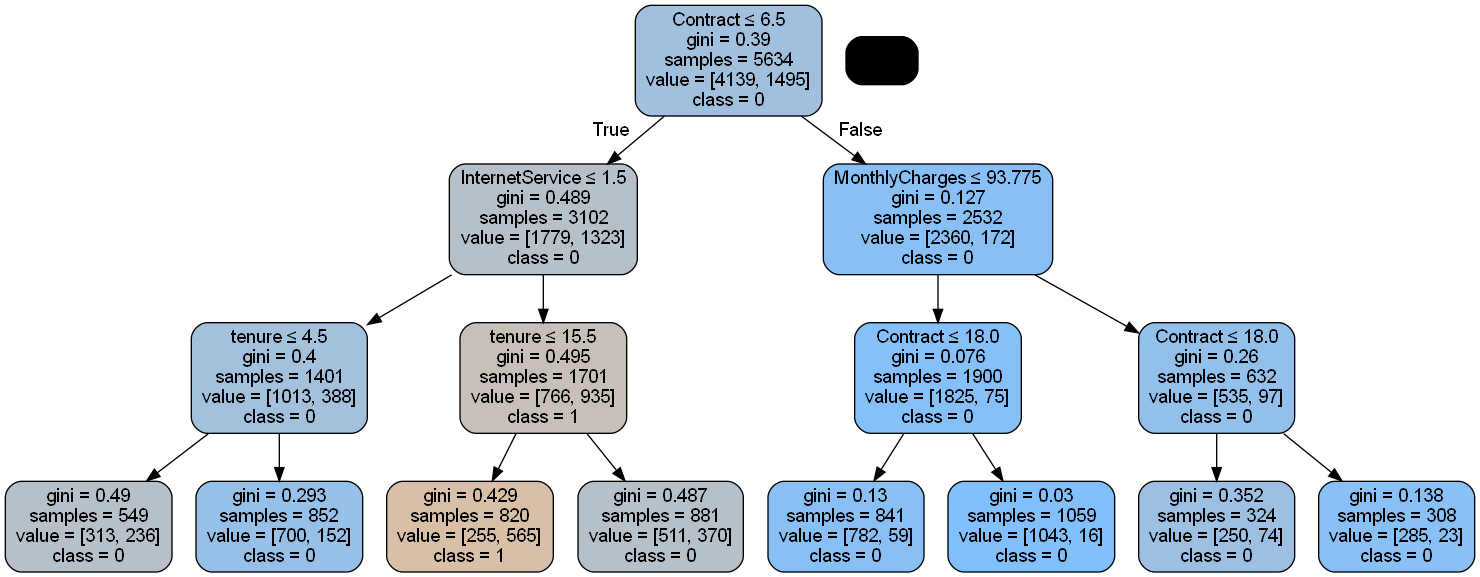

In [42]:
# Visualizing the Decision Tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model_dt, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = list(df_num.iloc[:, :19]),
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label(). \
                 split('value = [')[1].split(']')[0].split(',')]
        values = [int(255 * v / sum(values)) for v in values]
        # make colors 50% lighter
        tt = 0.5
        rr = 255 - int((255 - values[1])*tt)
        gg = 255 - int((255 - 128)*tt)
        bb = 255 - int((255 - values[0])*tt)
        color = '#{:02x}{:02x}{:02x}'.format(rr, gg, bb)
        node.set_fillcolor(color)
        
graph.write_pdf('churn_DT-3.pdf')
Image(graph.create_png())

In [44]:
# Building the Tree and Predicting

tree_depth = 5

#for tree depth in range(2, 15):
model_dt = DecisionTreeClassifier(criterion = "gini",
                                 random_state = 39,
                                 max_depth = tree_depth,
                                 min_samples_leaf = 50)

model_dt.fit(X_train, y_train)

# Predict on training and test data sets
y_pren_dt = model_dt.predict(X_train)
y_pret_dt = model_dt.predict(X_test)

#Training set results
cm_train_dt = confusion_matrix(y_train, y_pren_dt)

sens_dt = float(cm_train_dt[0,0]/(cm_train_dt[0,0] + cm_train_dt[0,1]))
spec_dt = float(cm_train_dt[1,1]/(cm_train_dt[1,0] + cm_train_dt[1,1]))

fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_dt, pos_label = 1)

print("d Accu Sens Spec AUC-ROC") #bring out of for-loop (when run)\
print(tree_depth, round(accuracy_score(y_train, y_pren_dt)*100, 2),\
     round(sens_dt*100, 2), round(spec_dt*100, 2), \
     round(metrics.auc(fpr, tpr)*100, 2))

d Accu Sens Spec AUC-ROC
5 79.8 86.11 62.34 74.22


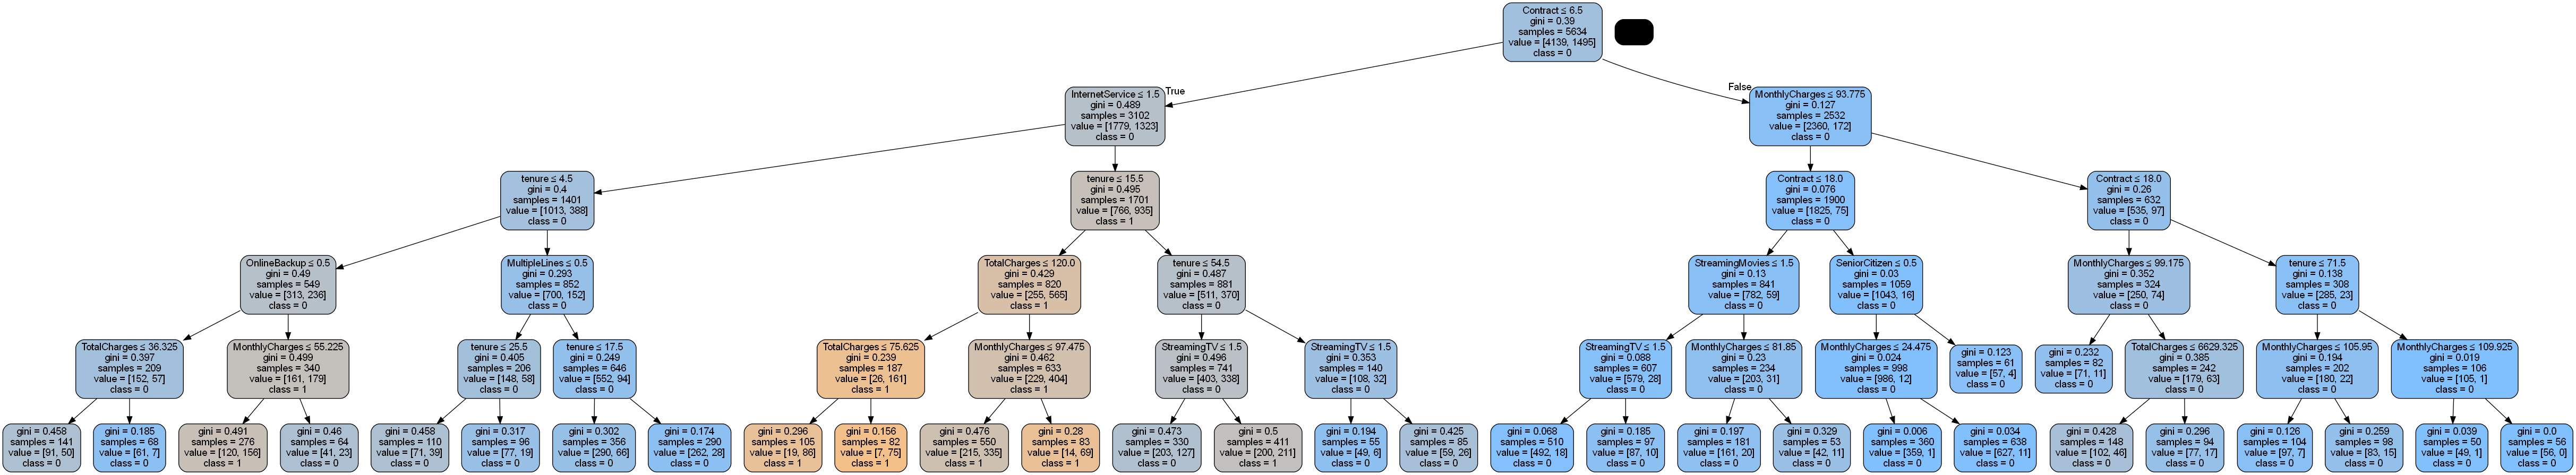

In [45]:
# Visualizing the Decision Tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model_dt, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = list(df_num.iloc[:, :19]),
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label(). \
                 split('value = [')[1].split(']')[0].split(',')]
        values = [int(255 * v / sum(values)) for v in values]
        # make colors 50% lighter
        tt = 0.5
        rr = 255 - int((255 - values[1])*tt)
        gg = 255 - int((255 - 128)*tt)
        bb = 255 - int((255 - values[0])*tt)
        color = '#{:02x}{:02x}{:02x}'.format(rr, gg, bb)
        node.set_fillcolor(color)
        
graph.write_pdf('churn_DT-3.pdf')
Image(graph.create_png())

In [65]:
# Building the Tree and Predicting

#tree_depth = 5

print("d Accu Sens Spec AUC-ROC") #bring out of for-loop (when run)

for tree_depth in range(2, 15):
    model_dt = DecisionTreeClassifier(criterion = "gini",
                                 random_state = 39,
                                 max_depth = tree_depth,
                                 min_samples_leaf = 50)

    model_dt.fit(X_train, y_train)

    # Predict on training and test data sets
    y_pren_dt = model_dt.predict(X_train)
    y_pret_dt = model_dt.predict(X_test)

    #Training set results
    cm_dt = confusion_matrix(y_train, y_pren_dt)

    sens_dt = float(cm_dt[0,0]/(cm_dt[0,0] + cm_dt[0,1]))
    spec_dt = float(cm_dt[1,1]/(cm_dt[1,0] + cm_dt[1,1]))

    fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_dt, pos_label = 1)

    #print("d Accu Sens Spec AUC-ROC") #bring out of for-loop (when run)\
    print(tree_depth, round(accuracy_score(y_train, y_pren_dt)*100, 2),\
     round(sens_dt*100, 2), round(spec_dt*100, 2), \
     round(metrics.auc(fpr, tpr)*100, 2))

d Accu Sens Spec AUC-ROC
2 76.46 81.49 62.54 72.02
3 78.97 93.84 37.79 65.82
4 79.29 89.95 49.77 69.86
5 79.8 86.11 62.34 74.22
6 80.64 89.37 56.45 72.91
7 80.95 91.54 51.64 71.59
8 81.22 90.99 54.18 72.58
9 81.24 91.62 52.51 72.06
10 81.24 91.62 52.51 72.06
11 81.24 91.62 52.51 72.06
12 81.24 91.62 52.51 72.06
13 81.24 91.62 52.51 72.06
14 81.24 91.62 52.51 72.06


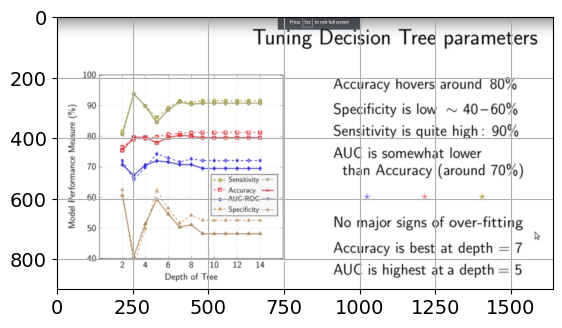

In [61]:
import matplotlib.image as mpimg

img = mpimg.imread('image1.png')
plt.imshow(img)

In [80]:
# Building the SVM model and Predicting

model_svm = SVC(kernel = 'poly', ## 'linear', 'poly', 'rbf', 'sigmoid'
               degree = 3,
               max_iter = 2000,
               random_state = 39)
model_svm.fit(X_train, y_train)

# Predict on training and test data sets

y_pren_svm = model_svm.predict(X_train)
y_pret_svm = model_svm.predict(X_test)

# Training set results
cm_svm = confusion_matrix(y_train, y_pren_svm)
accu_svm = accuracy_score(y_train, y_pren_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0] + cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0] + cm_svm[1,1])
fpr, tpr, thsold = metrics.roc_curve(y_train, y_pren_svm, pos_label = 1)

print("\n")
print("Confusion Matrix for SVM_train: \n", cm_svm)
print("Accuracy for SVM_train is: ", round(accu_svm*100, 2), "%")
print("Sensitivity for SVM_train is: ", round(sens_svm*100, 2), "%")
print("Specificity for SVM_train is: ", round(spec_svm*100, 2), "%")
print("The AUC_ROC for SVM_train: ", round(metrics.auc(fpr, tpr)*100,2), "%")

## Test set results
cm_svm = confusion_matrix(y_test, y_pret_svm)
accu_svm = accuracy_score(y_test, y_pret_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0] + cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0] + cm_svm[1,1])
fpr, tpr, thsold = metrics.roc_curve(y_test, y_pret_svm, pos_label = 1)

print("\n")
print("Confusion Matrix for SVM_train: \n", cm_svm)
print("Accuracy for SVM_train is: ", round(accu_svm*100, 2), "%")
print("Sensitivity for SVM_train is: ", round(sens_svm*100, 2), "%")
print("Specificity for SVM_train is: ", round(spec_svm*100, 2), "%")
print("The AUC_ROC for SVM_train: ", round(metrics.auc(fpr, tpr)*100,2), "%")



Confusion Matrix for SVM_train: 
 [[1803 2336]
 [ 330 1165]]
Accuracy for SVM_train is:  52.68 %
Sensitivity for SVM_train is:  43.56 %
Specificity for SVM_train is:  77.93 %
The AUC_ROC for SVM_train:  60.74 %


Confusion Matrix for SVM_train: 
 [[450 585]
 [ 64 310]]
Accuracy for SVM_train is:  53.94 %
Sensitivity for SVM_train is:  43.48 %
Specificity for SVM_train is:  82.89 %
The AUC_ROC for SVM_train:  63.18 %
